In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from scipy import spatial, linalg, sparse, stats
from sklearn import neighbors, decomposition, manifold, preprocessing, datasets
from sklearn.metrics.pairwise import pairwise_distances

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import time

from scipy.spatial.distance import pdist, squareform

In [2]:
import pandas as pd
import numpy as np
import phate
import scprep
import scanpy as sc

In [3]:
EBT_counts = sc.read_h5ad('EBT_counts_sqrt.h5ad')
cell_type = EBT_counts.obs['cell_type']

Calculating PHATE...
  Running PHATE on 16821 observations and 17845 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 6.89 seconds.
    Calculating KNN search...
    Calculated KNN search in 7.33 seconds.
    Calculating affinities...
    Calculated affinities in 0.66 seconds.
  Calculated graph and diffusion operator in 14.92 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.68 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.56 seconds.
  Calculated landmark operator in 3.72 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 2.32 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.42 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.02 seconds.
Calculated PHATE in 23.39 seconds.


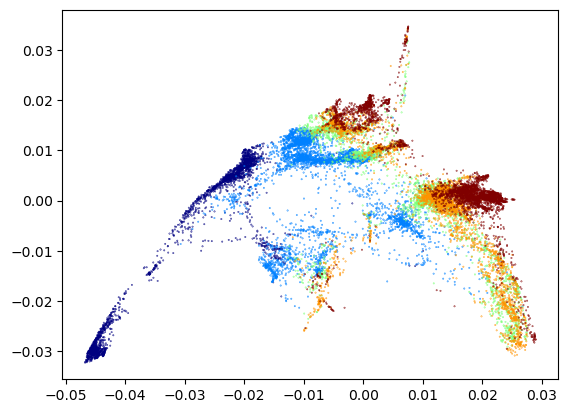

In [4]:
# cell_types
phate_operator = phate.PHATE(n_jobs=-2)

Y_phate = phate_operator.fit_transform(EBT_counts.X)

# scprep.plot.scatter2d(Y_phate, c=sample_labels, figsize=(12,8), cmap="Spectral",
#                       ticks=False, label_prefix="PHATE")
plt.scatter(Y_phate[:,0], Y_phate[:,1], c=cell_type,s=0.1,cmap='jet')

Calculating PHATE...
  Running PHATE on 16821 observations and 17845 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 7.68 seconds.
    Calculating KNN search...
    Calculated KNN search in 7.63 seconds.
    Calculating affinities...
    Calculated affinities in 8.76 seconds.
  Calculated graph and diffusion operator in 24.17 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.18 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.81 seconds.
  Calculated landmark operator in 5.63 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.32 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.09 seconds.
Calculated PHATE in 32.23 seconds.


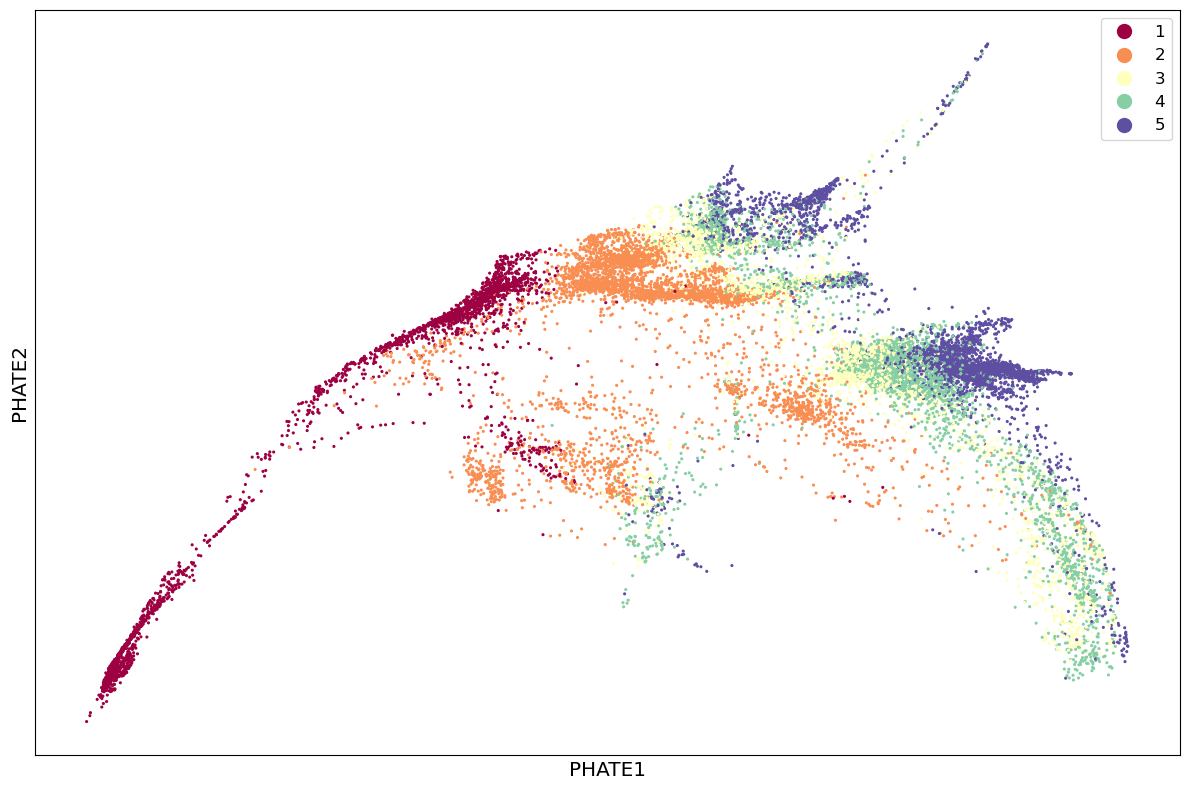

<Axes: xlabel='PHATE1', ylabel='PHATE2'>

In [5]:
phate_operator.set_params(knn=4, decay=15, t=12)

Y_phate = phate_operator.fit_transform(EBT_counts)

scprep.plot.scatter2d(Y_phate, c=cell_type, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

In [6]:
pd.DataFrame(Y_phate).to_csv('eb.Y_phate.csv')

In [7]:
diff_potential = phate_operator.diff_potential

The code runs 13s.


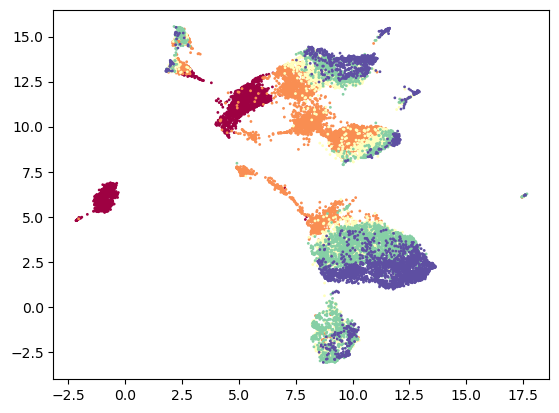

In [4]:
from umap import UMAP
pca_operator = decomposition.PCA(n_components=100)
eb_pca = pca_operator.fit_transform(np.array(EBT_counts.X))

start_time = time.time()
reducer = UMAP() #   n_neighbors=15,min_dist=0.6, random_state=0
Y_umap = reducer.fit_transform(eb_pca)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_umap[:,0],Y_umap[:,1], c=cell_type,s =1,cmap="Spectral")

In [5]:
pd.DataFrame(Y_umap).to_csv('eb.Y_umap.csv')

The code runs 77s.


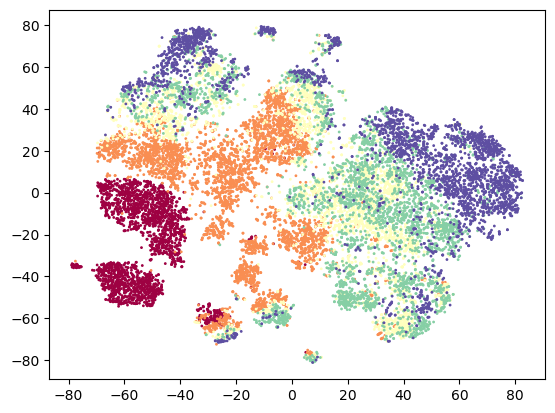

In [6]:
pca_operator = decomposition.PCA(n_components=100)

start_time = time.time()
tsne_operator = manifold.TSNE(n_components=2)
Y_tsne = tsne_operator.fit_transform(pca_operator.fit_transform(np.array(EBT_counts.X)))
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))

plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=cell_type,s =1,cmap="Spectral")

In [11]:
pd.DataFrame(Y_tsne).to_csv('eb.Y_tsne.csv')